In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [169]:
df1 = pd.read_csv("drive/MyDrive/Algoritmos-AM-e-RN/MachineLearning/Projeto03- Linkedin- Regressão Softmax/Dados/StarClassificationDataset.csv",sep=',',encoding='iso-8859-1')
df = df1.copy()

<ipython-input-169-3e234de8cbfd>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("drive/MyDrive/Algoritmos-AM-e-RN/MachineLearning/Projeto03- Linkedin- Regressão Softmax/Dados/StarClassificationDataset.csv",sep=',',encoding='iso-8859-1')


In [170]:
df.head()

,object_ID,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,1.240000e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,1.240000e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,1.240000e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,1.240000e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,1.240000e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,NaN,301,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY


In [171]:
df['class'].unique()

#Classificação não binaria, Uso da Softmax

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [172]:
df.drop(['object_ID'],axis=1,inplace=True)
df = df.dropna()

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99990 entries, 0 to 99998
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   alpha           99990 non-null  float64
 1   delta           99990 non-null  float64
 2   UV_filter       99990 non-null  float64
 3   green_filter    99990 non-null  float64
 4   red_filter      99990 non-null  float64
 5   near_IR_filter  99990 non-null  float64
 6   IR_filter       99990 non-null  float64
 7   run_ID          99990 non-null  object 
 8   rerun_ID        99990 non-null  int64  
 9   cam_col         99990 non-null  int64  
 10  field_ID        99990 non-null  int64  
 11  spec_obj_ID     99990 non-null  float64
 12  red_shift       99990 non-null  float64
 13  plate_ID        99990 non-null  int64  
 14  MJD             99990 non-null  int64  
 15  fiber_ID        99990 non-null  int64  
 16  class           99990 non-null  object 
dtypes: float64(9), int64(6), object(2)
m

#Features


*alpha*
*https://en.wikipedia.org/wiki/Right_ascension*

In [174]:
df['alpha'] = df['alpha'].astype(float)

<ipython-input-174-eb535c3dbae1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['alpha'] = df['alpha'].astype(float)


In [175]:
df['alpha'].unique()

array([135.6891066, 144.8261006, 142.1887896, ..., 224.5874074,
       212.2686211, 196.896053 ])

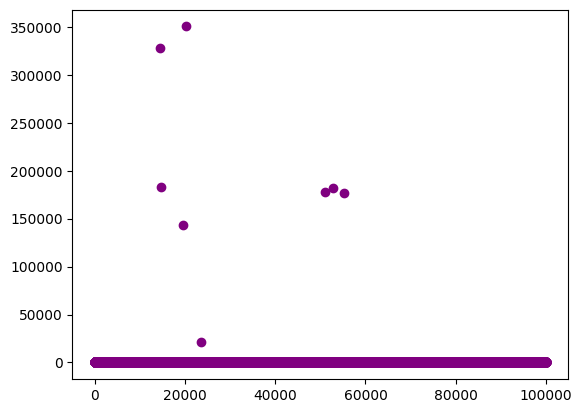

In [176]:
x = np.arange(len(df))
x.shape
plt.scatter(x,df['alpha'],color='purple')
plt.show()

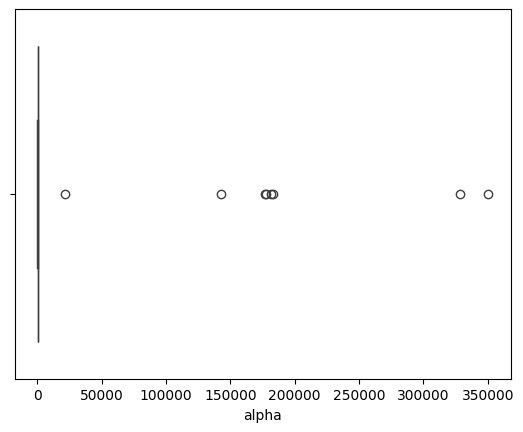

In [177]:
sns.boxplot(x=df['alpha'])
plt.show()

In [178]:
df = df.loc[df['alpha'] < 500]

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99998
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   alpha           99982 non-null  float64
 1   delta           99982 non-null  float64
 2   UV_filter       99982 non-null  float64
 3   green_filter    99982 non-null  float64
 4   red_filter      99982 non-null  float64
 5   near_IR_filter  99982 non-null  float64
 6   IR_filter       99982 non-null  float64
 7   run_ID          99982 non-null  object 
 8   rerun_ID        99982 non-null  int64  
 9   cam_col         99982 non-null  int64  
 10  field_ID        99982 non-null  int64  
 11  spec_obj_ID     99982 non-null  float64
 12  red_shift       99982 non-null  float64
 13  plate_ID        99982 non-null  int64  
 14  MJD             99982 non-null  int64  
 15  fiber_ID        99982 non-null  int64  
 16  class           99982 non-null  object 
dtypes: float64(9), int64(6), object(2)
m

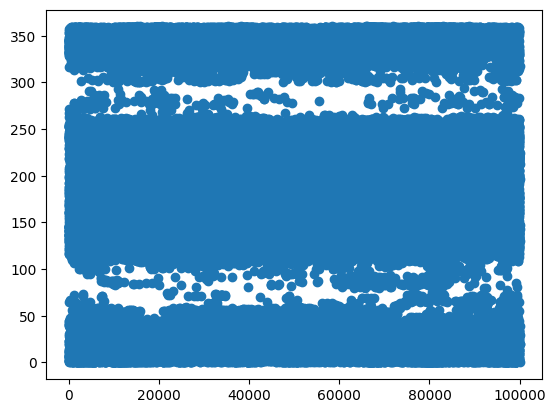

In [180]:
x = np.arange(len(df))
plt.scatter(x,df['alpha'])
plt.show()

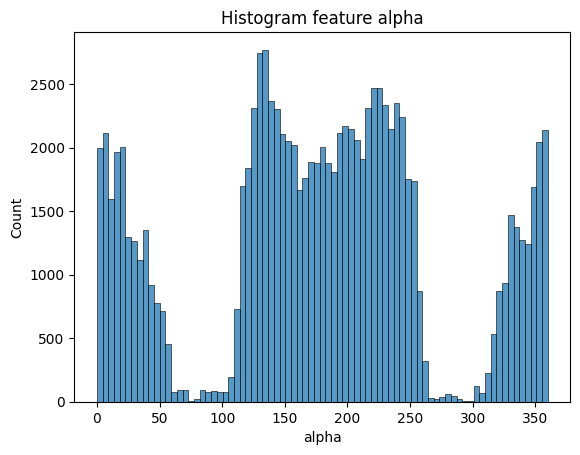

In [181]:
sns.histplot(data=df['alpha'])
plt.title("Histogram feature alpha")
plt.show()

<Axes: xlabel='alpha'>

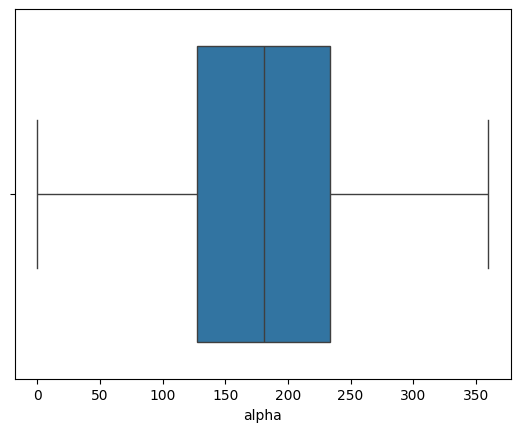

In [182]:
sns.boxplot(x=df['alpha'])

In [183]:
dpm = df['alpha'].std()
mean = df['alpha'].mean()
print(f"Média : {mean}")
print(f"Desvio Padrão: {dpm}")

Média : 177.6229895543447
Desvio Padrão: 96.50187887754177


In [184]:
ctd = ((df['alpha'] > (mean + dpm)) | (df['alpha'] < (mean - dpm))).sum()

In [185]:
ctd

32034

In [186]:
'''
Q1 = df['alpha'].quantile(0.25)
Q3 = df['alpha'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['alpha'] < (Q1 - 1.5 * IQR)) | (df['alpha'] > (Q3 + 1.5 * IQR)).sum()
'''


"\nQ1 = df['alpha'].quantile(0.25)\nQ3 = df['alpha'].quantile(0.75)\nIQR = Q3 - Q1\noutliers = (df['alpha'] < (Q1 - 1.5 * IQR)) | (df['alpha'] > (Q3 + 1.5 * IQR)).sum()\n  "

*Procurar alguma analise sobre esses valores fora do (mean+-desvpad), e o que fazer com eles*

*delta* *https://en.wikipedia.org/wiki/Equatorial_coordinate_system*

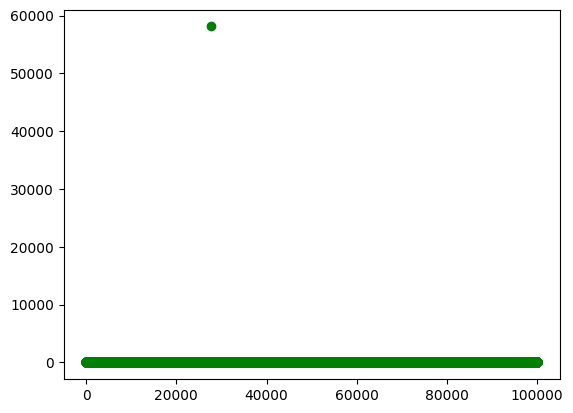

In [187]:
x = np.arange(len(df))
plt.scatter(x,df['delta'],color="green")
plt.show()

In [188]:
df = df.loc[df['delta'] < 10000]

<Axes: xlabel='delta', ylabel='Count'>

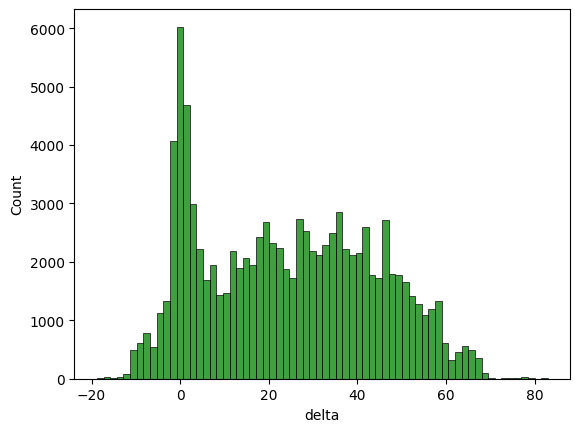

In [189]:
sns.histplot(data=df['delta'],color='green')

<Axes: xlabel='delta'>

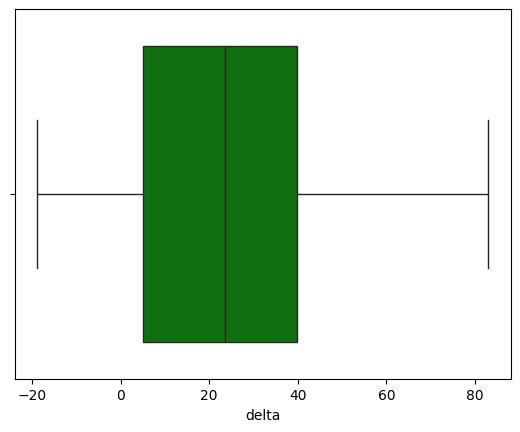

In [190]:
sns.boxplot(x=df['delta'],color='green')

In [191]:
dpm = df['delta'].std()
mean = df['delta'].mean()
print(f"Média : {mean}")
print(f"Desvio Padrão: {dpm}")

Média : 24.135211995205673
Desvio Padrão: 19.644381931949123


In [192]:
ctd = ((df['delta'] > (mean + dpm)) | (df['delta'] < (mean - dpm))).sum()

In [193]:
ctd

43379